In [ ]:
!pip install -q kaggle
!cp kaggle.json ~/.kaggle/
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

cp: cannot stat 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json
 98% 1.06G/1.08G [00:09<00:00, 136MB/s]
100% 1.08G/1.08G [00:09<00:00, 116MB/s]


In [ ]:
!zip -r testset.zip testset/

	zip warning: name not matched: testset/

zip error: Nothing to do! (try: zip -r testset.zip . -i testset/)


In [ ]:
!unzip the-simpsons-characters-dataset.zip
!rm -rf the-simpsons-characters-dataset.zip
!rm -rf simpsons_dataset/simpsons_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [ ]:
!nvidia-smi

Wed Feb 21 08:08:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
#kaggle pars


import shutil
import os



!rm -rf testset
os.mkdir("testset")
test_data_name = os.listdir("kaggle_simpson_testset/kaggle_simpson_testset")
for i in range(len(test_data_name)):
  name = test_data_name[i]
  dst = "testset/"+ name[:name.rfind('_')]
  path = "kaggle_simpson_testset/kaggle_simpson_testset/"+name

  if not os.path.exists(dst):
    os.mkdir(dst)
  shutil.copyfile(path, dst+"/"+name)


content = os.listdir('simpsons_dataset')
content.sort()

for i in content:
    dst = "testset/"+i
    src = "simpsons_dataset/"+i
    file_name = os.listdir(src)[0]
    src =src +  "/" + os.listdir(src)[0]

    print(src)
    if not os.path.exists(dst):
      os.mkdir(dst)
      dst = dst + "/" + file_name
      shutil.copyfile(src,dst)




simpsons_dataset/abraham_grampa_simpson/pic_0258.jpg
simpsons_dataset/agnes_skinner/pic_0016.jpg
simpsons_dataset/apu_nahasapeemapetilon/pic_0258.jpg
simpsons_dataset/barney_gumble/pic_0016.jpg
simpsons_dataset/bart_simpson/pic_0258.jpg
simpsons_dataset/carl_carlson/pic_0016.jpg
simpsons_dataset/charles_montgomery_burns/pic_0258.jpg
simpsons_dataset/chief_wiggum/pic_0258.jpg
simpsons_dataset/cletus_spuckler/pic_0016.jpg
simpsons_dataset/comic_book_guy/pic_0258.jpg
simpsons_dataset/disco_stu/pic_0006.jpg
simpsons_dataset/edna_krabappel/pic_0258.jpg
simpsons_dataset/fat_tony/pic_0016.jpg
simpsons_dataset/gil/pic_0016.jpg
simpsons_dataset/groundskeeper_willie/pic_0016.jpg
simpsons_dataset/homer_simpson/pic_1822.jpg
simpsons_dataset/kent_brockman/pic_0258.jpg
simpsons_dataset/krusty_the_clown/pic_0258.jpg
simpsons_dataset/lenny_leonard/pic_0258.jpg
simpsons_dataset/lionel_hutz/pic_0001.jpg
simpsons_dataset/lisa_simpson/pic_0258.jpg
simpsons_dataset/maggie_simpson/pic_0016.jpg
simpsons_data

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3))
        self.pool1 = nn.MaxPool2d(3, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3,3))
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*20*20, 128)
        self.fc2 = nn.Linear(128, 42)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 64 * 20 * 20)
        x = nn.functional.relu (self.fc1(x))
        x = self.fc2(x)
        return x


$$
ReLU = max(0, X)
$$

In [ ]:
transform = transforms.Compose([transforms.Resize((128, 128)), transforms.RandomHorizontalFlip(), transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), transforms.ToTensor()])
data_set =  datasets.ImageFolder("simpsons_dataset", transform=transform)

valid_count = int(len(data_set)*0.2)

train_set, valid_set = random_split(data_set,[len(data_set)-valid_count,valid_count])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)
validate_loader = torch.utils.data.DataLoader(valid_set, batch_size = 32, shuffle = True)

transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])

test_set =  datasets.ImageFolder("testset", transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32)

In [ ]:
model = Net().cuda()
model.load_state_dict(torch.load("/content/drive/MyDrive/model_data.pt"))
criterion = nn.CrossEntropyLoss().cuda()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/model_data.pt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = Net().cuda()
criterion = nn.CrossEntropyLoss().cuda()


accuracy_per_epoch = []
recall_per_epoch = []
precision_per_epoch = []


running_loss_per_epoch = []
validation_loss_per_epoch = []
validation_accuracy =[]
validation_recall = []
validation_precision = []

$$
SGD:=\ x_{k+1} = x_k + \alpha_kg_k\\
\alpha_k - learning\ rate\\
g_k - аппроксимация\ градиента\ целевой\ функции
$$

In [ ]:
from sklearn import metrics
import statistics
epochs = 40
buff = 0
for epoch in range(epochs):
    labels = []
    reals = []
    labels_val = []
    reals_val = []
    precision_per_batch = []
    val_accuracy_per_batch = []

    optimizer = torch.optim.SGD(model.parameters(), lr=0.02/(epoch+1), momentum=0.8,weight_decay=1e-03)
    running_loss = 0.0
    model.train()
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i,data in enumerate(train_loader, 0):
        x, label = data
        x = x.cuda()
        label=label.cuda()
        optimizer.zero_grad()
        y = model(x)
        loss = criterion(y, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        labels.append(label.cpu().numpy())
        reals.append((y.argmax(dim=1)).cpu().numpy())
        precision = metrics.precision_score(reals[i], labels[i], average='micro')
        precision_per_batch.append(precision)

    total =0
    correct = 0
    # validation
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for i,data in enumerate(validate_loader, 0):
            x, label = data
            x = x.cuda()
            label = label.cuda()
            y = model(x)
            loss = criterion(y, label)
            val_loss += loss.item()
            labels_val.append(label.cpu().numpy())
            reals_val.append((y.argmax(dim=1)).cpu().numpy())
            val_accuracy = metrics.accuracy_score(reals_val[i], labels_val[i])
            val_accuracy_per_batch.append(val_accuracy)

    precision = statistics.mean(precision_per_batch)
    val_accuracy = statistics.mean(val_accuracy_per_batch)
    print(f'Epoch {epoch+1}/{epochs}, Precision: {precision}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(validate_loader)}, Val Accuracy: {val_accuracy}%')

Epoch 1/40, Precision: 0.20459967036780013, Train Loss: 2.8308024087935, Val Loss: 2.4626799403256134, Val Accuracy: 0.3335657662947739%
Epoch 2/40, Precision: 0.3838534437890354, Train Loss: 2.270996782160897, Val Loss: 2.136436203963884, Val Accuracy: 0.41759028185554903%
Epoch 3/40, Precision: 0.4637079285218598, Train Loss: 1.9957759186966728, Val Loss: 1.9641806760817084, Val Accuracy: 0.4690619495008808%
Epoch 4/40, Precision: 0.5040932945870923, Train Loss: 1.8283050726843244, Val Loss: 1.8405603952990233, Val Accuracy: 0.5022570463887258%
Epoch 5/40, Precision: 0.5467286172796669, Train Loss: 1.671124252995462, Val Loss: 1.7818763783869853, Val Accuracy: 0.5165883734586024%
Epoch 6/40, Precision: 0.5759943181818182, Train Loss: 1.5636171406234494, Val Loss: 1.6655663506675313, Val Accuracy: 0.5455996770405167%
Epoch 7/40, Precision: 0.5997896426092991, Train Loss: 1.4626094494157165, Val Loss: 1.597454263963772, Val Accuracy: 0.5770331767469172%
Epoch 8/40, Precision: 0.6261114

In [ ]:
# print(real)
from sklearn import metrics
import numpy as np
# print(labels[1])
# print(reals[1])
precision = metrics.precision_score(reals[0], labels[0], average='micro')
precision

0.03125

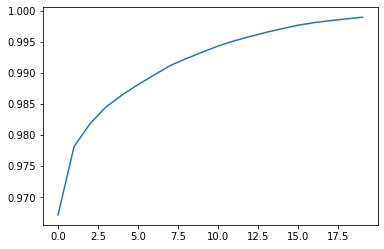

In [ ]:
import matplotlib.pyplot as plt

plt.plot(accuracy_per_epoch)

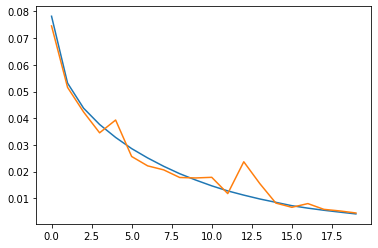

In [ ]:
plt.plot(running_loss_per_epoch)
plt.plot(validation_loss_per_epoch)

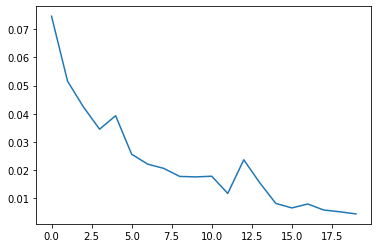

In [ ]:
plt.plot(validation_loss_per_epoch)

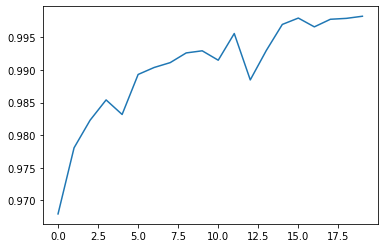

In [ ]:
plt.plot(validation_accuracy)

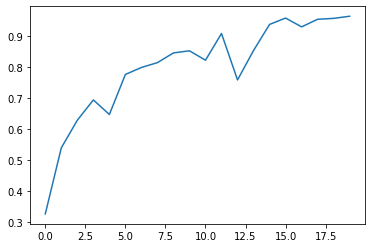

In [ ]:
plt.plot(validation_recall)


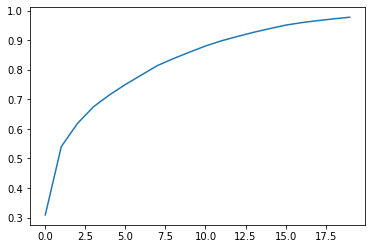

In [ ]:
plt.plot(precision_per_epoch)

In [ ]:
import numpy as np
import os




accuracy = np.zeros(42)
all = np.zeros(42)
running_loss = 0.0
for i,data in enumerate(test_loader, 0):
    x, label = data
    x = x.cuda()
    all[label]+=1
    label = label.cuda()
    y = model(x)
    loss = criterion(y, label)
    running_loss += loss.item()


    buff=label.to('cpu')[(y.argmax(dim=1)==label).to('cpu').numpy()]
    accuracy[buff] += 1

print(accuracy,all)
print(sum(accuracy)/sum(all))


NameError: name 'test_loader' is not defined

In [ ]:
labels = ['Дед Абрахам',
          'Агнес Скиннер',
          'Апу индус',
          'Барни Гамбли',
          'Барт',
          'Карл Карлсон',
          'Чарльз Бёрнс',
          'Шеф Виггум',
          'Клетус',
          'Чел с комиксами',
          'Диско Стью',
          'Една Крабаппел',
          'Толстяк Тони',
          'Гил',
          'Вилли',
          'Гомер',
          'Кент',
          'Клоун Красти',
          'Ленни Леонард',
          'Лионель Хатз',
          'Лизякула',
          'Мэгги',
          'Мардж',
          'Мартин Принц',
          'Мэр Кимби',
          'Милхаус ван Хутен',
          'Мисс Хувер',
          'Мо Сизлок',
          'Нед Фландерс',
          'Нельсон Мунтз',
          'Отто Манн',
          'Пэтти Бувер',
          'Директор Скиннер',
          'Фрик',
          'Райнер Волкзамок',
          'Ральф Виггум',
          'Сельма Бувер',
          'Сайдшоу Боб',
          'Сайдшоу Мел',
          'Змея Птицаклетка',
          'Трой Маккларен',
          'Вейлон Смиттерс']


Лизякула


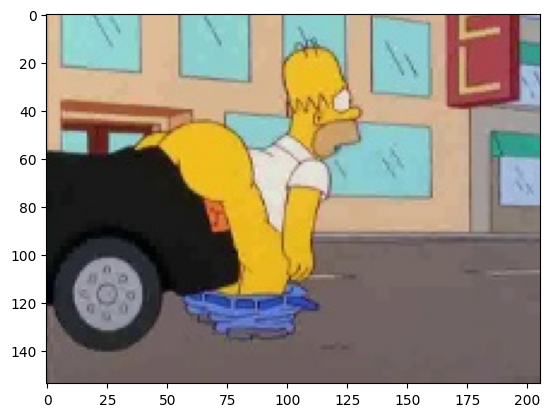

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_15.jpg')
plt.imshow(image)
plt.show
image = transform(image).unsqueeze(0).cuda()
with torch.no_grad():
  output = model(image)
pred = (output.argmax(dim=1)).to('cpu').numpy()
print(labels[pred[0]])


In [ ]:
torch.save(model.state_dict(), 'model.pth')